# <font color='red'>**Image segmentation Using**</font> <font color='blue'>**Kmeans**</font>

***Book:Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow***

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

## Load Data

In [11]:
from matplotlib.image import imread # you could also use `imageio.imread()`
import os
image = imread("pneu.jpeg")

img_shape = image.shape
img_shape

(480, 640, 3)

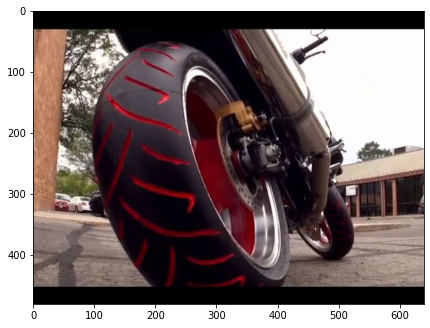

In [12]:
plt.figure(figsize = (7, 7))
plt.imshow(image)

## Reshape Data

In [13]:
width = img_shape[0]
height = img_shape[1]

N = width * height 
new_img = image.reshape(N, img_shape[2])

#other way 
#X = image.reshape(-1, 3) 
#X.shape  ---> (191256, 3)

new_img.shape  

(307200, 3)

In [14]:
data = pd.DataFrame(new_img)

#How many different colors are in this picture ?
color_count =  data.drop_duplicates().shape[0]
color_count

52703

## Kmeans

In [ ]:
# one color
km = KMeans(n_clusters= 1)
km.fit(reshaped_img)

X_compressed_1 = km.cluster_centers_[km.labels_, :]

X_compressed_1 = X_compressed_1.astype(np.uint8)
img_compressed_1 = X_compressed_1.reshape(width, height, img_shape[2])


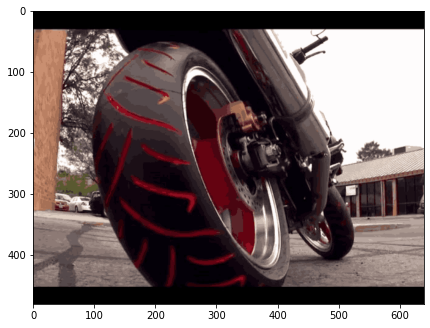

In [16]:
kmeans = KMeans(n_clusters=32).fit(new_img) 
compressed_img = kmeans.cluster_centers_[kmeans.labels_, :] # X_compressed = centers[labels, :]
#compressed_img = compressed_img.astype(np.uint8) # N.B : not mandatory, we get a black image when using it here 

compressed_img = compressed_img.astype(np.uint8)

#Plot image compressed
segmented_img = compressed_img.reshape(image.shape) #img_compressed = X_compressed.reshape(width, height, img_shape[2])
#segmented_img.shape  ---> (312, 613, 3)

plt.figure(figsize = (7, 7))
plt.imshow(segmented_img)

working with 2 clusters...
working with 4 clusters...
working with 6 clusters...
working with 8 clusters...
working with 10 clusters...
working with 12 clusters...


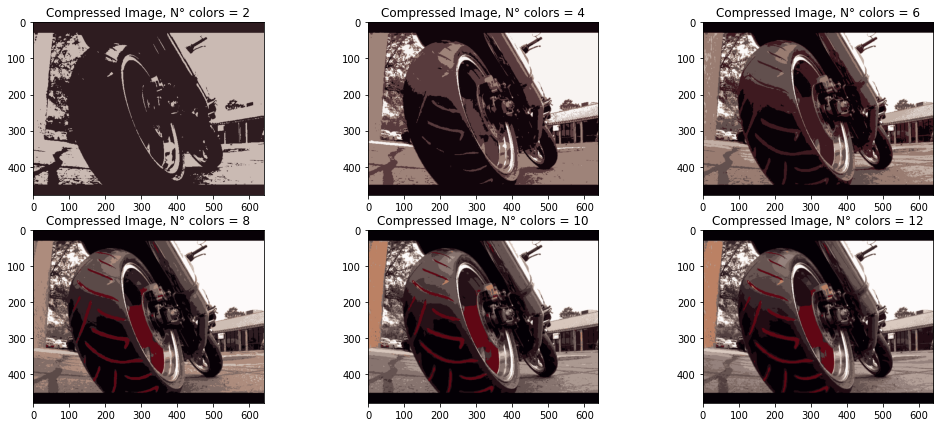

In [17]:
compressed = []
fig, ax = plt.subplots(2, 3 ,figsize = (17, 7))

#new_img = image.reshape(N, img_shape[2])

for j, i in enumerate(list(range(2, 14, 2))):
    print('working with ' + str(i) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = i, max_iter=10)
    kmeans.fit(new_img)
    
    # compute compressed astronaut
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    X_compressed = centers[labels, :]
    X_compressed = X_compressed.astype(np.uint8)

    segmented_img = X_compressed.reshape(img_shape[0], img_shape[1], img_shape[2])
    compressed.append(segmented_img)
    # printing
    if j <3 :
        ax[0,j].imshow(segmented_img)
        ax[0,j].set_title('Compressed Image, N° colors = ' + str(i))
    else:
        ax[1,j-3].imshow(segmented_img)
        ax[1,j-3].set_title('Compressed Image, N° colors = ' + str(i))
    